# Data Science & Business Analytics Tasks
### Intern: Gayathri Devi Nagalapuram
## Task- 3 Exploratory Data Analysis - Retail

To Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data? 

## Importing Packages

In [131]:
import pandas as pd
import pandas as pd
import numpy as np  
import seaborn as sns
from plotnine import *
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

## Reading Dataset

In [73]:
# reading from the SampleSuperstore.csv
s_data = pd.read_csv('sample_data/SampleSuperstore.csv')
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Data Exploration

In [74]:
s_data.shape

(9994, 13)

In [79]:
# Let's print the columns (features) names.
s_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [80]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [81]:
s_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [82]:
# Describing more statistical information on the dataset
s_data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [83]:
# Checking the dupilication in data
s_data.duplicated().sum()

17

In [84]:
s_data.drop_duplicates(inplace = True)
s_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [85]:
s_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Statistic Figures

In [86]:
s_data["Sales"].count()

9977

In [87]:
s_data["Sales"].mean()

230.14890150345346

In [88]:
s_data["Sales"].std()

623.7214089819958

In [89]:
s_data["Sales"].min()

0.444

In [90]:
#Deleting the Variable.
col=['Postal Code']
s_data1=s_data.drop(columns=col,axis=1)

#Correlation Between Variables.
s_data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [91]:
# Covariance of columns
s_data1.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


In [93]:
s_data1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Visualization

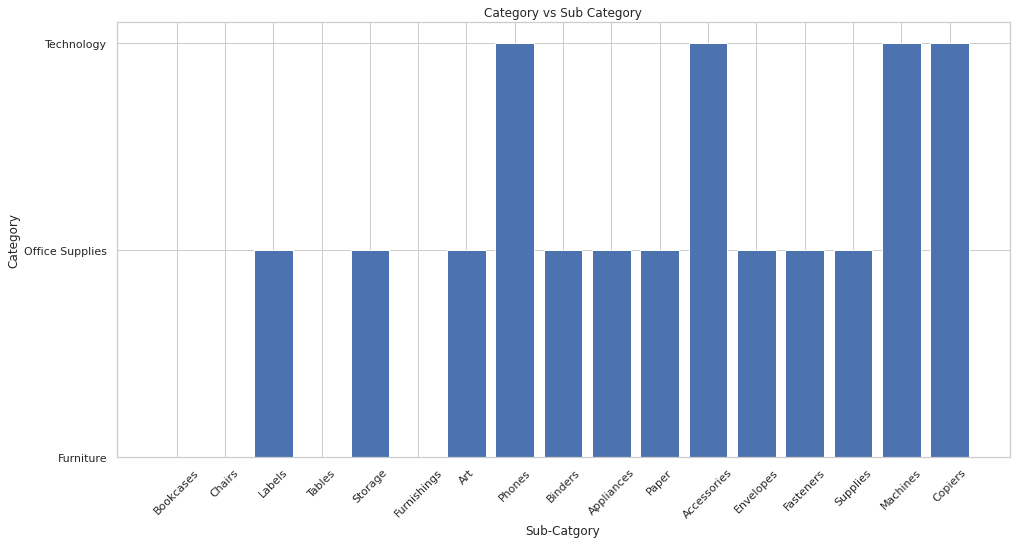

In [94]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=s_data1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

In [96]:
s_data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


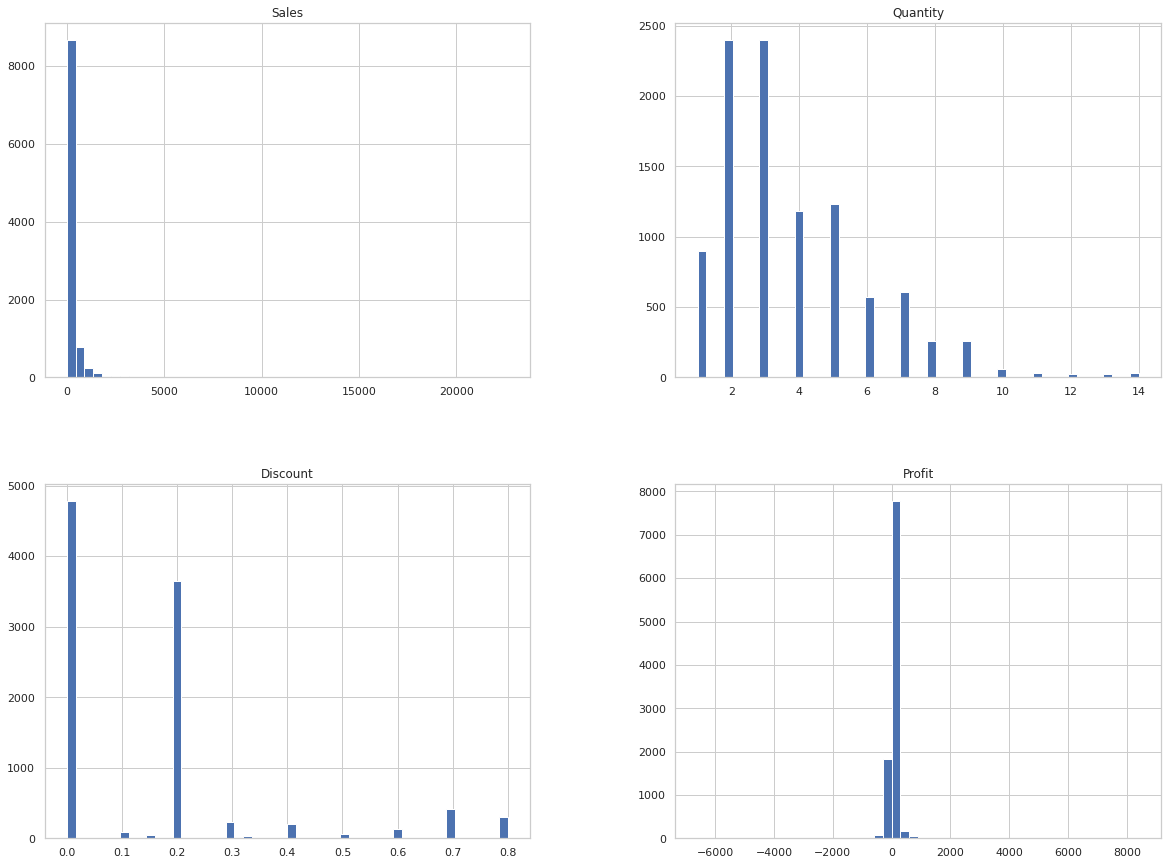

In [97]:
s_data1.hist(bins=50 ,figsize=(20,15))
plt.show();

In [98]:
# Count the total repeatable states
s_data1['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

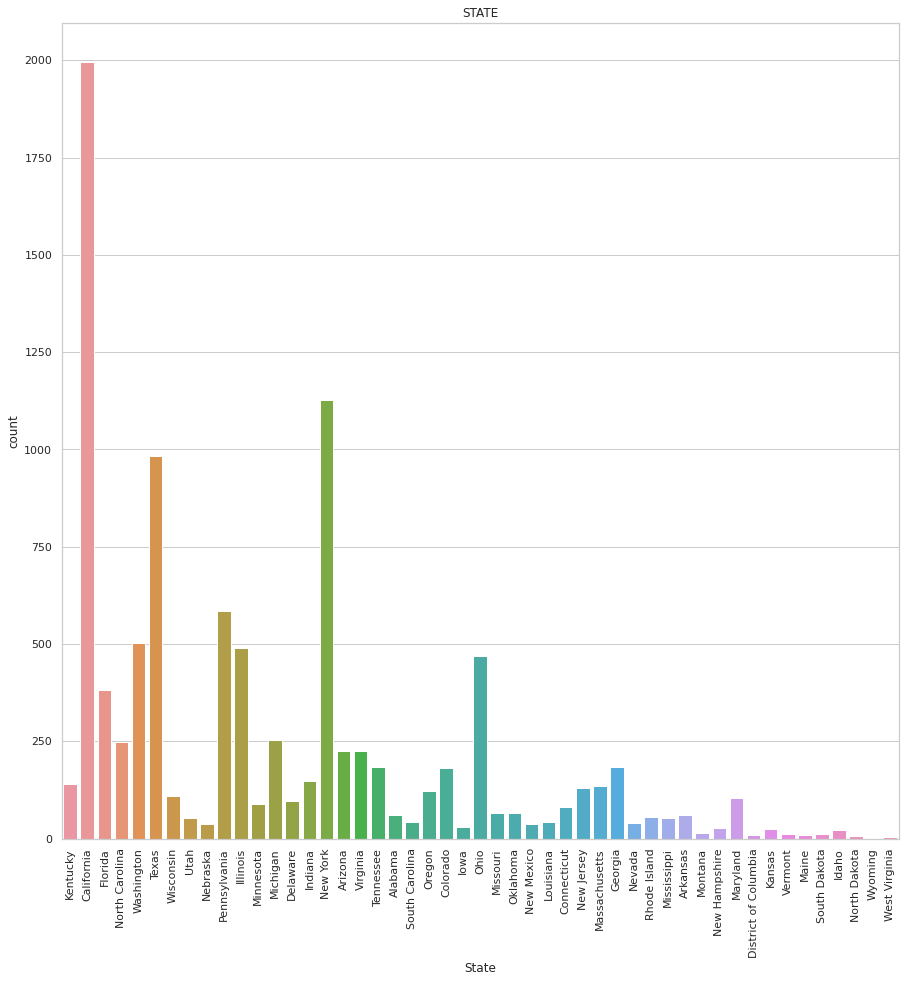

In [99]:
plt.figure(figsize=(15,15))
sns.countplot(x=s_data1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

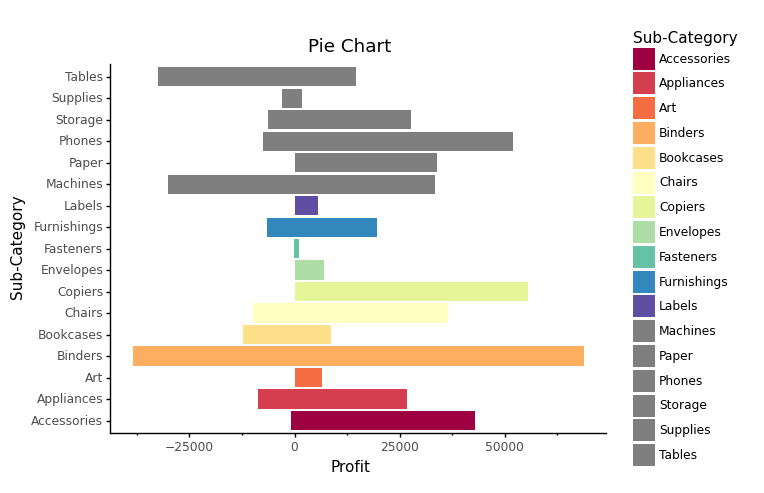

<ggplot: (-9223363249662597204)>

In [100]:
Profit_plot = (ggplot(s_data, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
                     + scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)


*   The Pie chart shows the profit and loss of all the subcategories.
*   Here from graph we can visualize that "**Binders**" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories.
*   The reason might be the discounts given on Binders subcategory.
*   Next, "**Copiers**" Sub-category has gain highest amount of profit with no loss.
*   There are other sub-categories too which did not face any kind of loss but their profit margins are also low.

*   Next, Suffering from highest loss is "**Machines**".


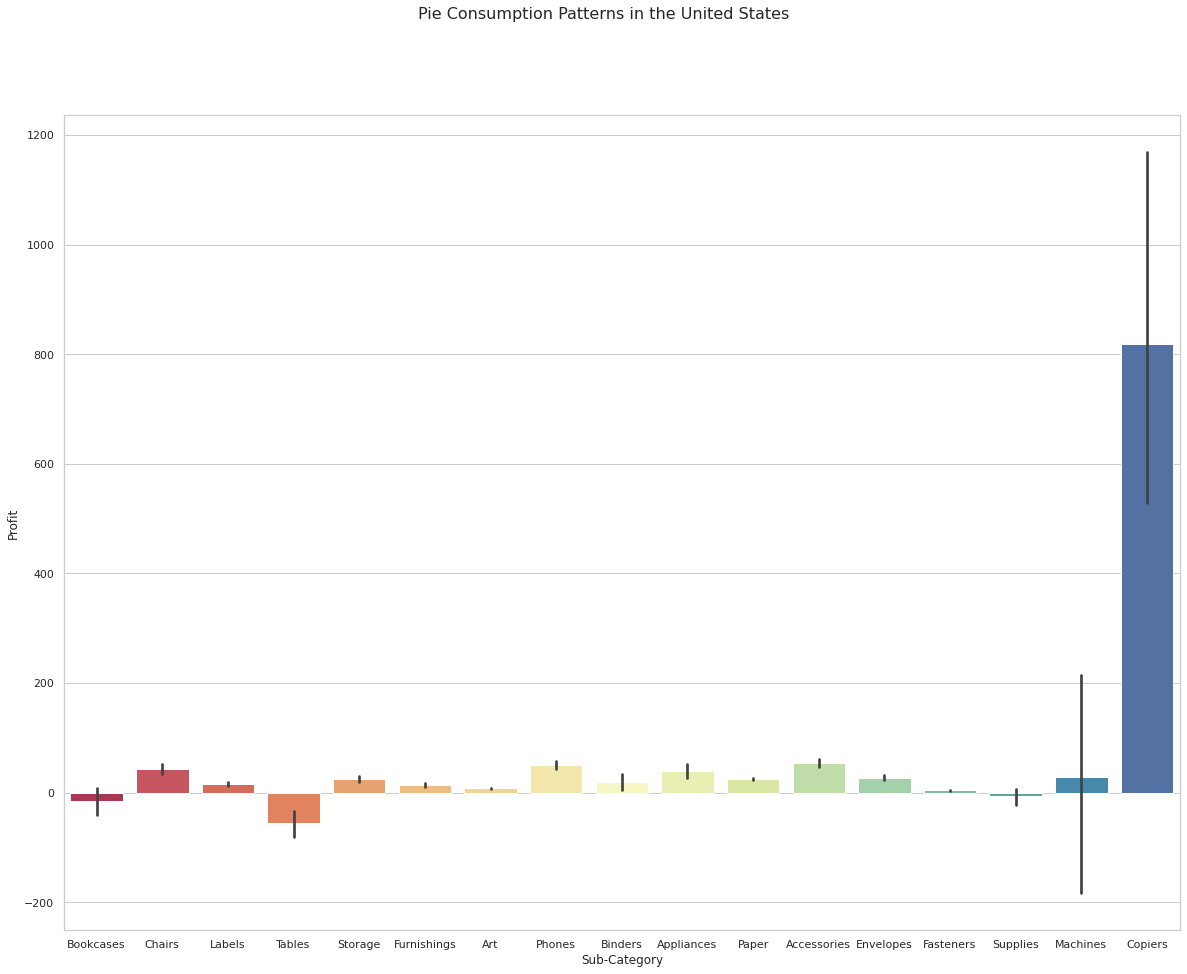

In [102]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit', data=s_data, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

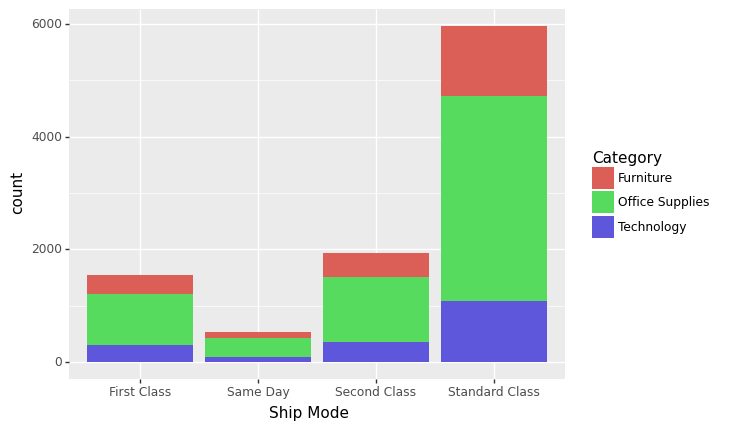

<ggplot: (8787187698254)>

In [104]:
ggplot(s_data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

<function matplotlib.pyplot.show>

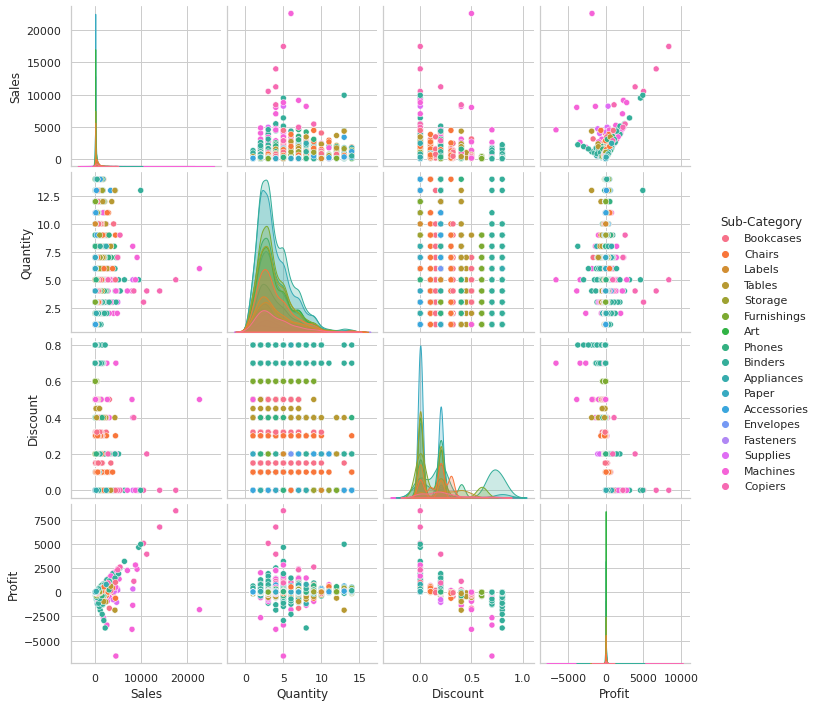

In [106]:
figsize=(15,10)
sns.pairplot(s_data1,hue='Sub-Category')
plt.show

## Checking Sales from Every Segment of the Whole Data

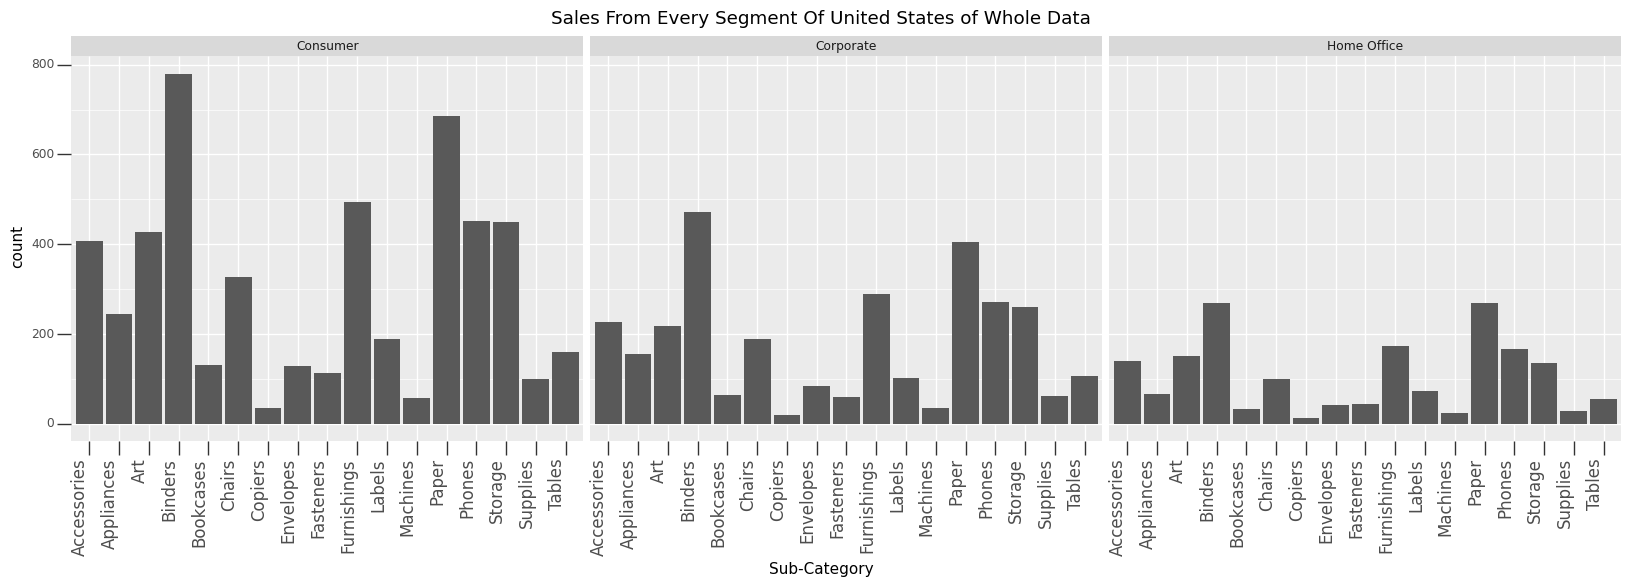

<ggplot: (-9223363249661734873)>

In [118]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(20,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(s_data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment'])
       + flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

*  From this Graph we can say that "**Home Office**" segment has less purchased Sub-Categories and in that "**Tables**","**Supplies**","**Machines**","**Copiers**","**Bookcases**" has the lowest Sales. 
*  "**Consumer**" has purchased more sub-categories when compared to other segments.

## Discount on Categories From Every Segment Of Whole Data

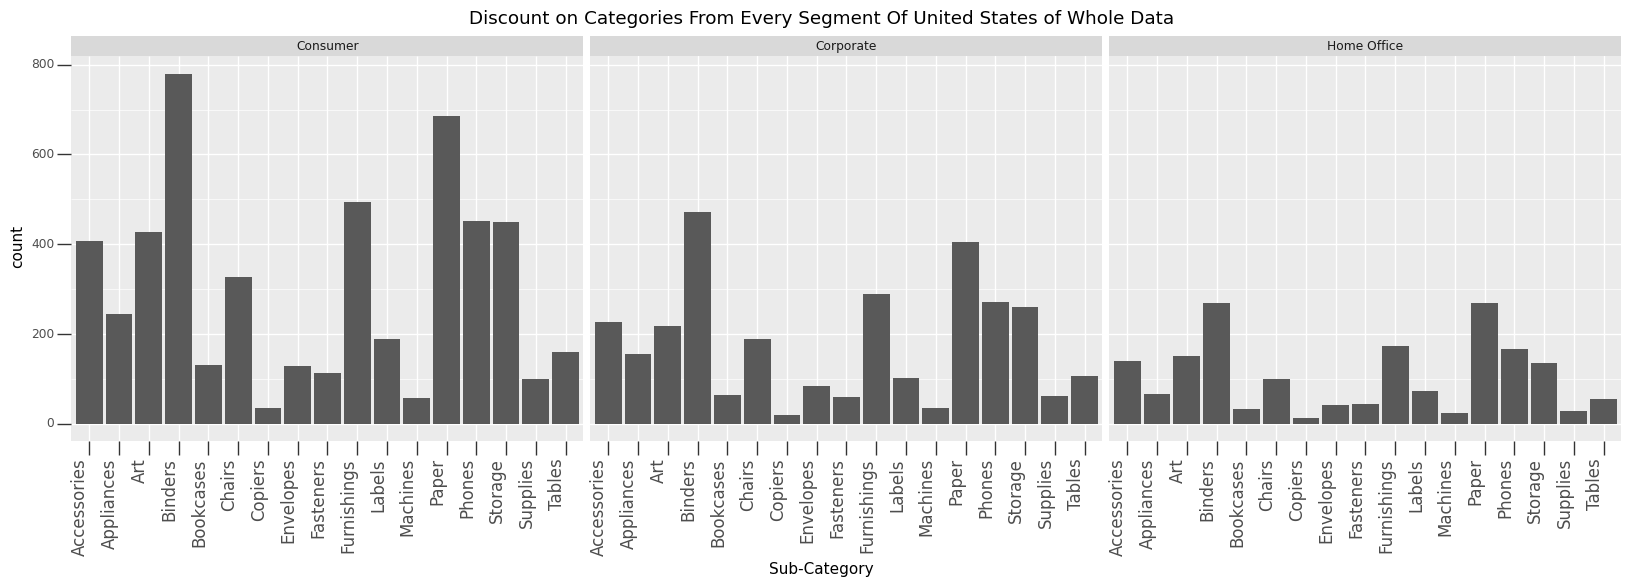

<ggplot: (-9223363249661734670)>

In [117]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(20,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(s_data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
  + flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

## Sales From Every Region of Whole Data

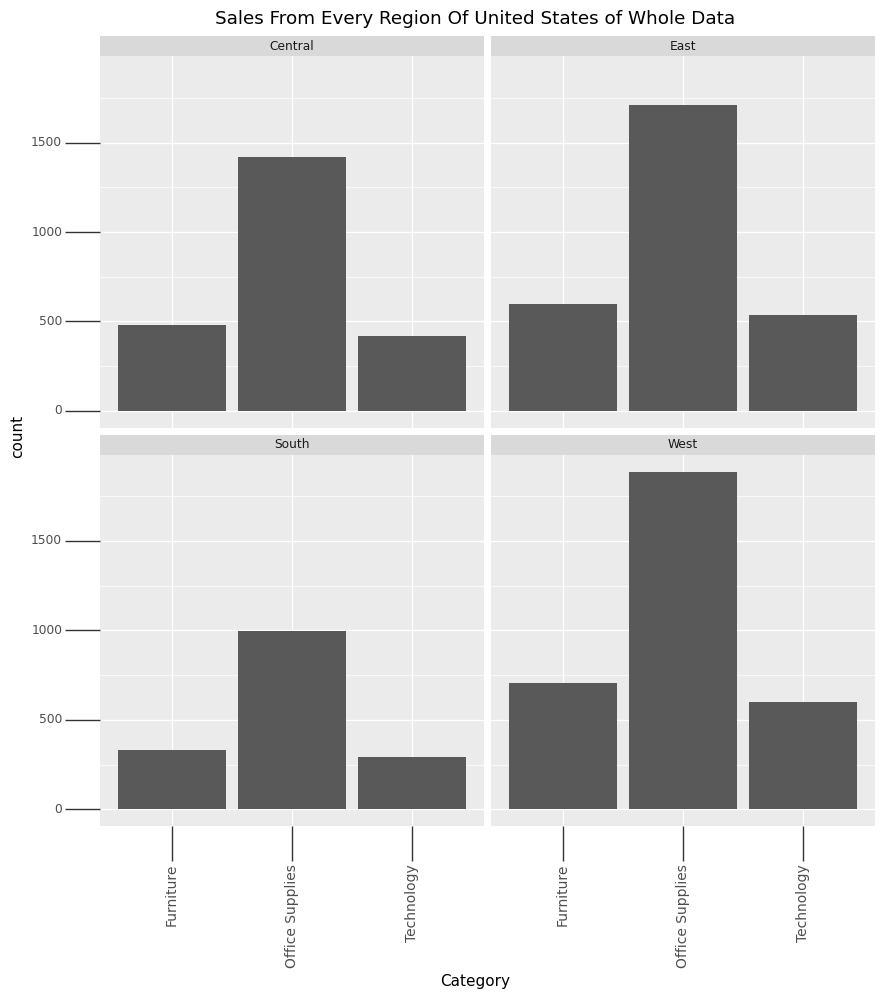

<ggplot: (-9223363249664431093)>

In [122]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=25,axis_ticks_length_minor=25)
(ggplot(s_data1, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

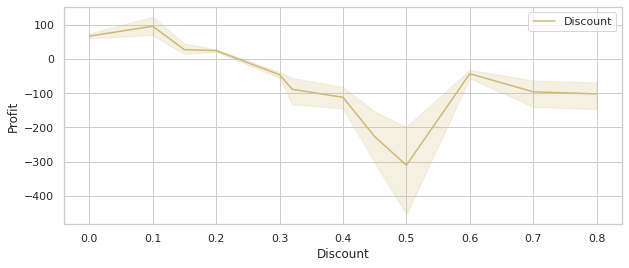

In [124]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=s_data1 , color='y',label='Discount')
plt.legend()
plt.show()

In [126]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware':
              'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
              'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
              'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
              'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR',
              'Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
              'Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI',
              'Wyoming': 'WY'}

s_data1['state_code'] = s_data1.State.apply(lambda x: state_code[x])

In [128]:
state_data = s_data1[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

##  Data Analysis

* Now, let us analyze the sales of a few random states from each profit bracket *(high profit, medium profit, low profit, low loss and high loss) *and try to observe some crucial trends which might help us in increasing the sales.

* We have a few questions to answer here.

 1. What products do the most profit making states buy?

 2. What products do the loss bearing states buy?

 3. What product segment needs to be improved in order to drive the profits higher?





In [129]:
def state_data_viewer(states):
    product_data = s_data1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()
       

* Plots the turnover generated by different product categories and sub-categories for the list of given states.
* **Arguments:** *states*- List of all the states you want the plots for
* **Returns:** *None*

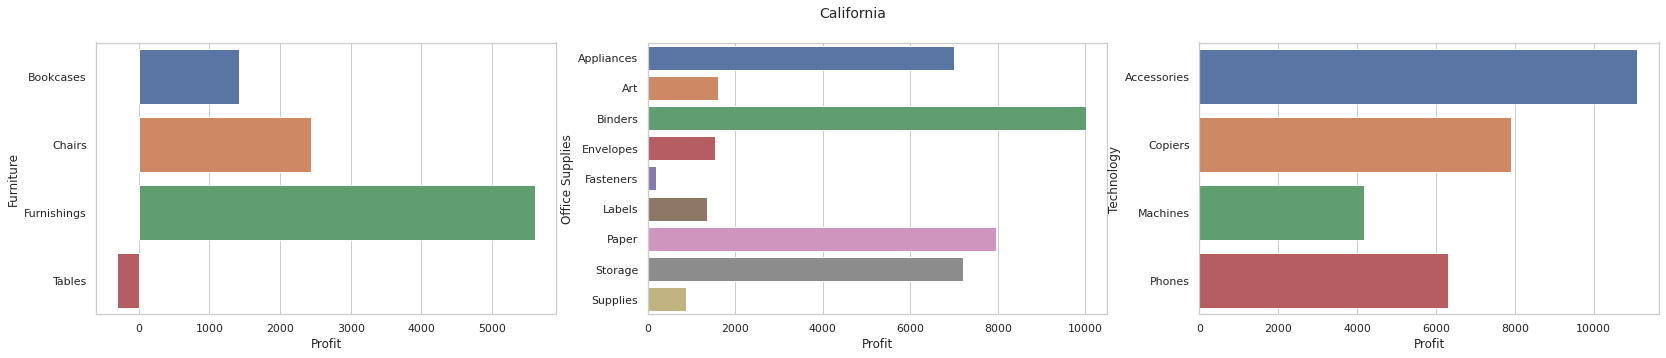

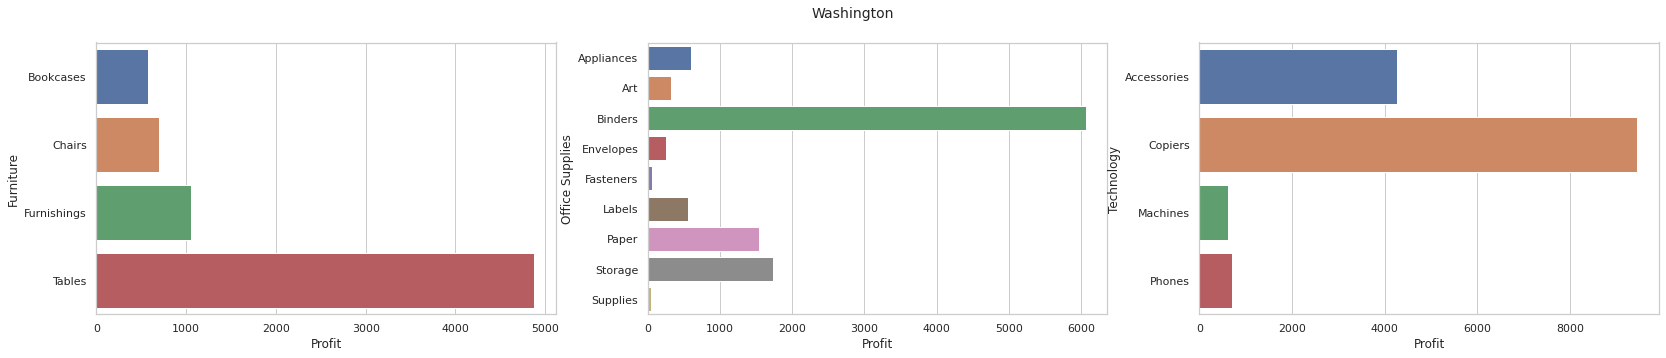

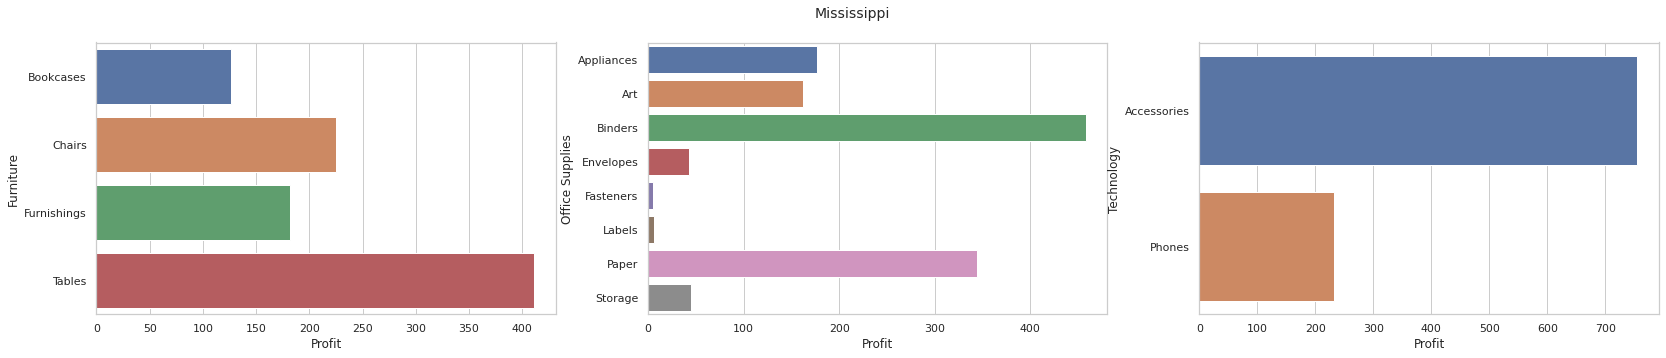

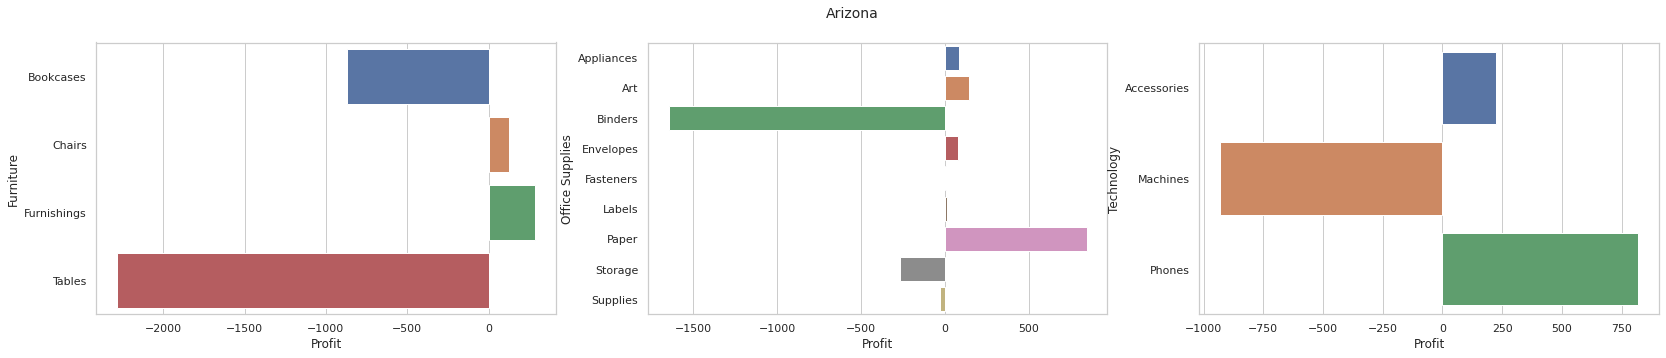

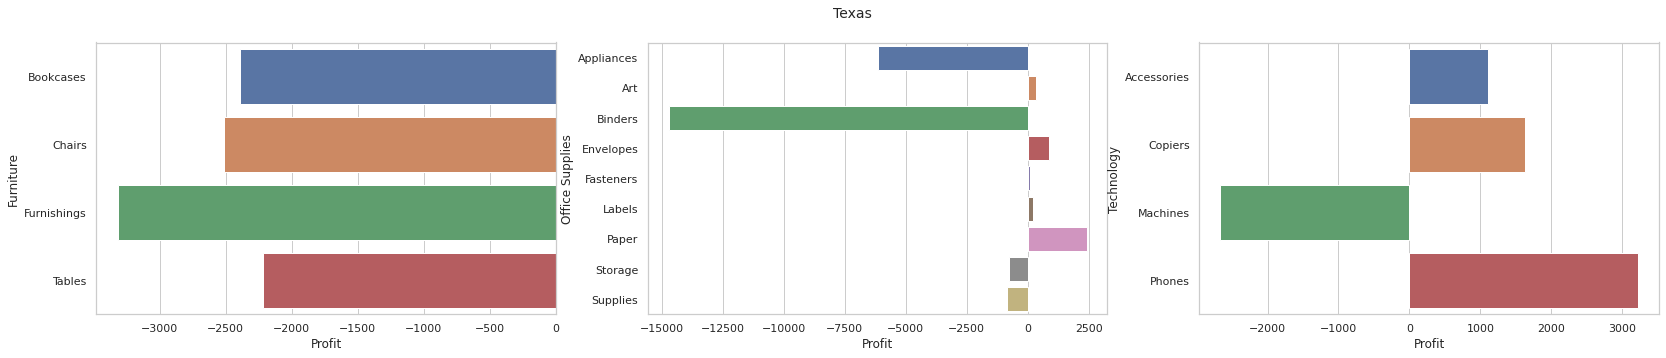

In [130]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

## Using Cluster Analysis(K-Means Clustering)

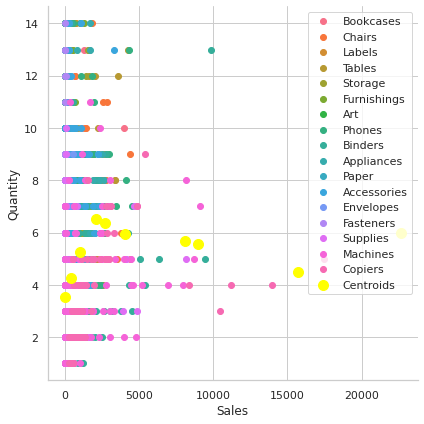

In [134]:
x = s_data.iloc[:, [9, 10, 11, 12]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid") 
sns.FacetGrid(s_data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

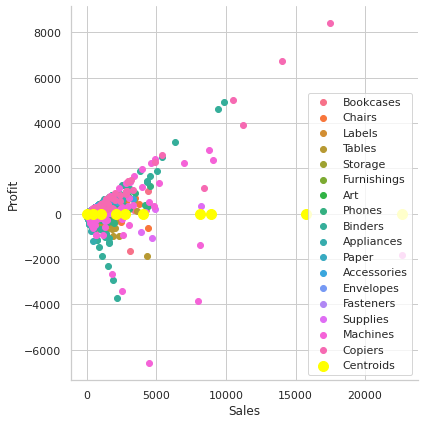

In [135]:
sns.set_style("whitegrid") 
sns.FacetGrid(s_data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

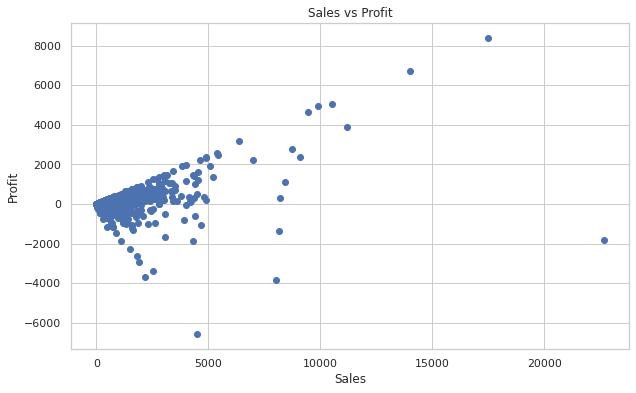

In [137]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(s_data1["Sales"] , s_data1["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

* From the Above data Visualization and Clustering, we can see in which states and in which Category **Sales** and **profits** are High and low,We can improve **Sales** in that States by Providing **Discounts** in prefered Range so that bothn the Company and consumer will be in profit.

* So, For Deciding that Range we have to do some Technical Analysis.
One can Do it through **Factor Analysis**, or also can Do it throgh Neural Networks.

* While the superstore is incurring losses due to the discounts they offer on their products, they can't stop giving discounts on their products. 

* Most of the heavy discounts are given during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock.

* Also, by incurring small losses, the company gains in the future by attracting more long term customers. 

* Therefore, the small losses from discounts are an essential part of Company's business.